<img src="https://drive.google.com/uc?export=view&id=1fAJYSODc50f9u-REmTKKyWl9feQszLOp"  width="1000px" height="500px">

In [ ]:
#@title **Load libs** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
sns.set_theme()
pd.__version__

'1.3.5'

In [ ]:
#@title **Montar el drive** { display-mode: "form"}
import os
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/'
os.chdir(path)

Mounted at /content/drive


In [ ]:
#@title **Cargando dataset** { display-mode: "form"}
d = pd.read_csv("IA_proyecto/heart.csv")
d.head(30)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
#@title *Cantidad de columnas y filas*
d.shape

(918, 12)

# **Análisis de datos**  <a name="eje1"></a>

In [ ]:
#@title **Columnas con valores únicos**
for column in d.columns:
    if(d[column].dtype=='object'):
        print(f'The unique values in column "{column}" are: {d[column].unique()} \n')

The unique values in column "Sex" are: ['M' 'F'] 

The unique values in column "ChestPainType" are: ['ATA' 'NAP' 'ASY' 'TA'] 

The unique values in column "RestingECG" are: ['Normal' 'ST' 'LVH'] 

The unique values in column "ExerciseAngina" are: ['N' 'Y'] 

The unique values in column "ST_Slope" are: ['Up' 'Flat' 'Down'] 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


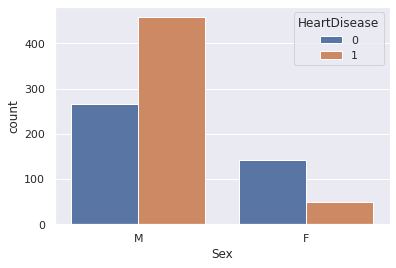

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


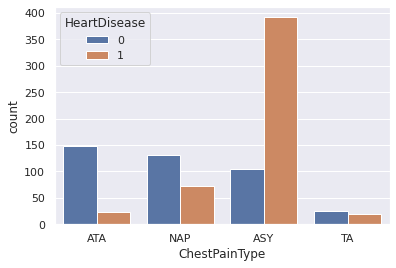

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


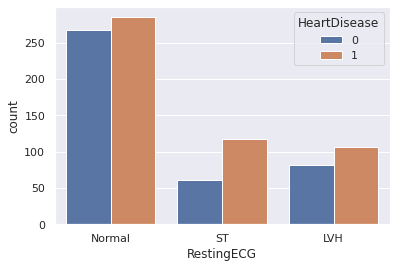

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


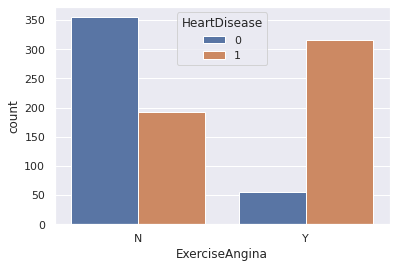

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


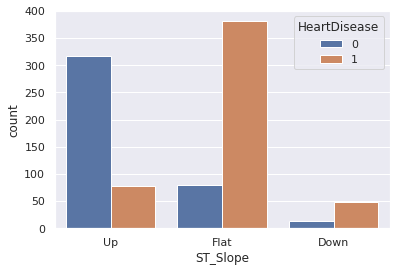

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


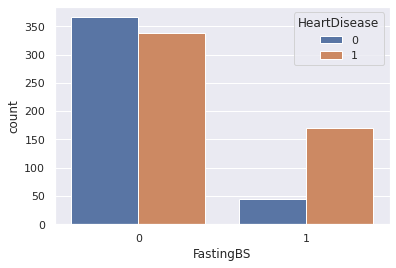

In [ ]:
#@title **Cantidad de fallecidos según los valores únicos**
for column in d.columns:
    if(d[column].dtype=='object'):
        sns.countplot(d[column],hue=d['HeartDisease'])
        plt.show()
sns.countplot(d['FastingBS'],hue=d['HeartDisease'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


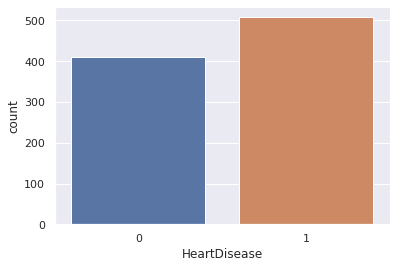

In [ ]:
#@title **Cantidad de fallecidos según el dataset**
sns.countplot(d['HeartDisease'])
plt.show()

In [ ]:
#@title **Columnas con valores numéricos**
numerical_col=[]
for column in d.columns:
    if((d[column].dtype!='object') & (len(d[column].unique())>2)):
        numerical_col.append(column)
numerical_col

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


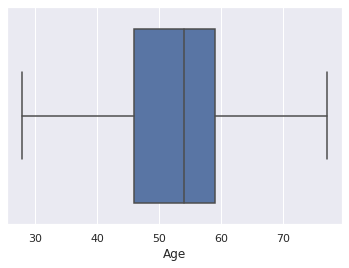

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


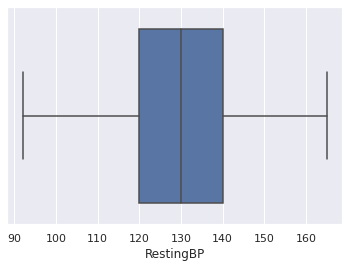

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


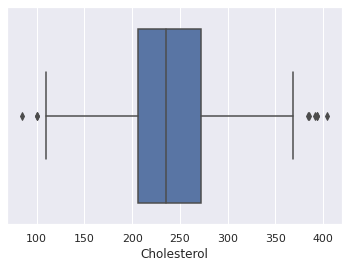

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


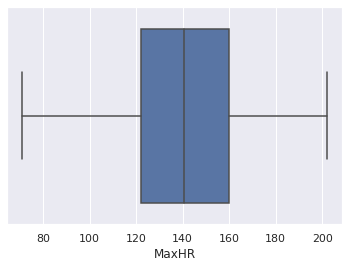

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


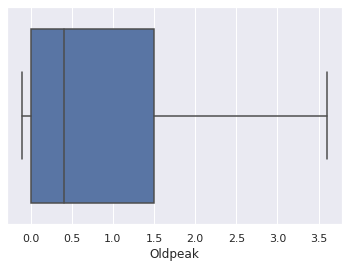

In [ ]:
#@title **Diagramas de cajas para las columnas numéricas**
for column in numerical_col:
    Q1=d[column].quantile(0.25)
    Q3=d[column].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+ 1.5*IQR
    lower=Q1- 1.5*IQR
    d=d[(d[column]>lower) & (d[column]<upper)]

for column in numerical_col:
    sns.boxplot(d[column])
    plt.show()

In [ ]:
#@title **Dataset con valores numéricos en las columnas de valores únicos**

categorical_col=d.drop(numerical_col,axis=1)
for column in categorical_col.drop('HeartDisease',axis=1):
    le=LabelEncoder()
    d[column]=le.fit_transform(d[column])
#pd.get_dummies(data=d, drop_first=True)
d.head(71)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
70,57,1,1,140,265,0,2,145,1,1.0,1,1
71,44,1,1,130,215,0,1,135,0,0.0,2,0
72,52,1,0,120,182,0,1,150,0,0.0,1,1
73,44,0,0,120,218,0,2,115,0,0.0,2,0


## Predicción de HeartDisease(Infarto) utilizando el DecisionTreeClassifier

# Seleccionar variables

In [ ]:
data=d[['Age','ChestPainType','RestingBP','FastingBS','Cholesterol','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']]
X = data.drop(["HeartDisease"],axis = 1)
y = data.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size=0.3)

# Entrenando modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier()

est.fit(X_train,y_train)

DecisionTreeClassifier()

# Calculando la predicción 

In [ ]:
a =y_test
predi=est.predict(X_test)
print(predi)
print(a)
print(model2.score(X_test, y_test))


[0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0]
14     0
806    1
151    0
703    0
552    1
      ..
203    0
583    0
572    1
565    1
96     0
Name: HeartDisease, Length: 207, dtype: int64
0.8454106280193237


# Caso Prueba

In [ ]:
a=X_test.sample()
a.iloc[0,0]=56
#ChestPainType 
a.iloc[0,1]=2
#RestingBP
a.iloc[0,2]=115
#FastingBS
a.iloc[0,3]=0
#Cholesterol
a.iloc[0,4]=250
#RestingECG 
a.iloc[0,5]=2
#MaxHR
a.iloc[0,6]=115
#ExerciseAngina
a.iloc[0,7]=0
#Oldpeak
a.iloc[0,8]=1.5
#ST_Slope 
a.iloc[0,9]=1
print(a)
print(est.predict(a))

     Age  ChestPainType  RestingBP  FastingBS  Cholesterol  RestingECG  MaxHR  \
177   56              2        115          0          250           2    115   

     ExerciseAngina  Oldpeak  ST_Slope  
177               0      1.5         1  
[0]


# Predicción de HeartDisease(Infarto) utilizando el Random Forest

## Seleccionar Variables

In [ ]:
data=d[['Age','ChestPainType','RestingBP','FastingBS','Cholesterol','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']]


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(["HeartDisease"],axis = 1)


y = data.HeartDisease


X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size=0.3)

## Entrenamiento

In [ ]:
model2=RandomForestClassifier()

model2.fit(X_train,y_train)

RandomForestClassifier()

## Predicción

In [ ]:

predi=model2.predict(X_test)
print(predi)
print(y_test)
print(model2.score(X_test, y_test))

[0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1
 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0]
14     0
806    1
151    0
703    0
552    1
      ..
203    0
583    0
572    1
565    1
96     0
Name: HeartDisease, Length: 207, dtype: int64
0.8454106280193237


# Prueba específica

In [ ]:
a=X_test.sample()
a.iloc[0,0]=56
#ChestPainType 
a.iloc[0,1]=2
#RestingBP
a.iloc[0,2]=115
#FastingBS
a.iloc[0,3]=0
#Cholesterol
a.iloc[0,4]=250
#RestingECG 
a.iloc[0,5]=2
#MaxHR
a.iloc[0,6]=115
#ExerciseAngina
a.iloc[0,7]=0
#Oldpeak
a.iloc[0,8]=1.5
#ST_Slope 
a.iloc[0,9]=1
print(a)
print(est.predict(a))

     Age  ChestPainType  RestingBP  FastingBS  Cholesterol  RestingECG  MaxHR  \
845   56              2        115          0          250           2    115   

     ExerciseAngina  Oldpeak  ST_Slope  
845               0      1.5         1  
[0]
